In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("unlabeled.csv") 
train = pd.read_csv("training_v2.csv") 

In [25]:
name = train.columns[98:136]    #column names


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,Acute Care/Floor,Floor,927,admit,Cardiac ICU,0.298611,0,72.9,NaN,113.0
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,Emergency Department,Floor,925,admit,Med-Surg ICU,0.120139,0,158.0,NaN,113.0
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,Emergency Department,Accident & Emergency,908,admit,Med-Surg ICU,0.046528,0,78.9,2.9,123.0
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,Emergency Department,Accident & Emergency,922,admit,Med-Surg ICU,0.081944,0,55.9,NaN,108.0


In [4]:
for i in name:
    if (train[i].isna().sum()/91713)>0.7:
        print(i, train[i].isna().sum()/91713)

d1_lactate_max 0.7457612334129294
d1_lactate_min 0.7457612334129294
h1_albumin_max 0.9139816601790368
h1_albumin_min 0.9139816601790368
h1_bilirubin_max 0.9226500059969688
h1_bilirubin_min 0.9226500059969688
h1_bun_max 0.8187606991375268
h1_bun_min 0.8187606991375268
h1_calcium_max 0.8271782626236194
h1_calcium_min 0.8271782626236194


In [5]:
#drop d1_lactate_max, d1_lactate_min, h1_albumin_min, h1_albumin_max, h1_bilirubin_min,
#h1_bilirubin_max,h1_bun_min, h1_bun_max,h1_calcium_min,h1_calcium_max (too much missing data)

# d1_albumin_max & d1_albumin_min

In [6]:
x = train.h1_albumin_max.dropna()
y = train.h1_albumin_min.dropna()
sum(x!=y)

37

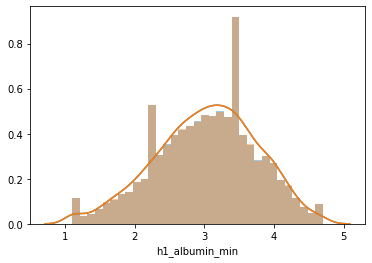

In [7]:
sns.distplot(x)
sns.distplot(y)

# Distribution

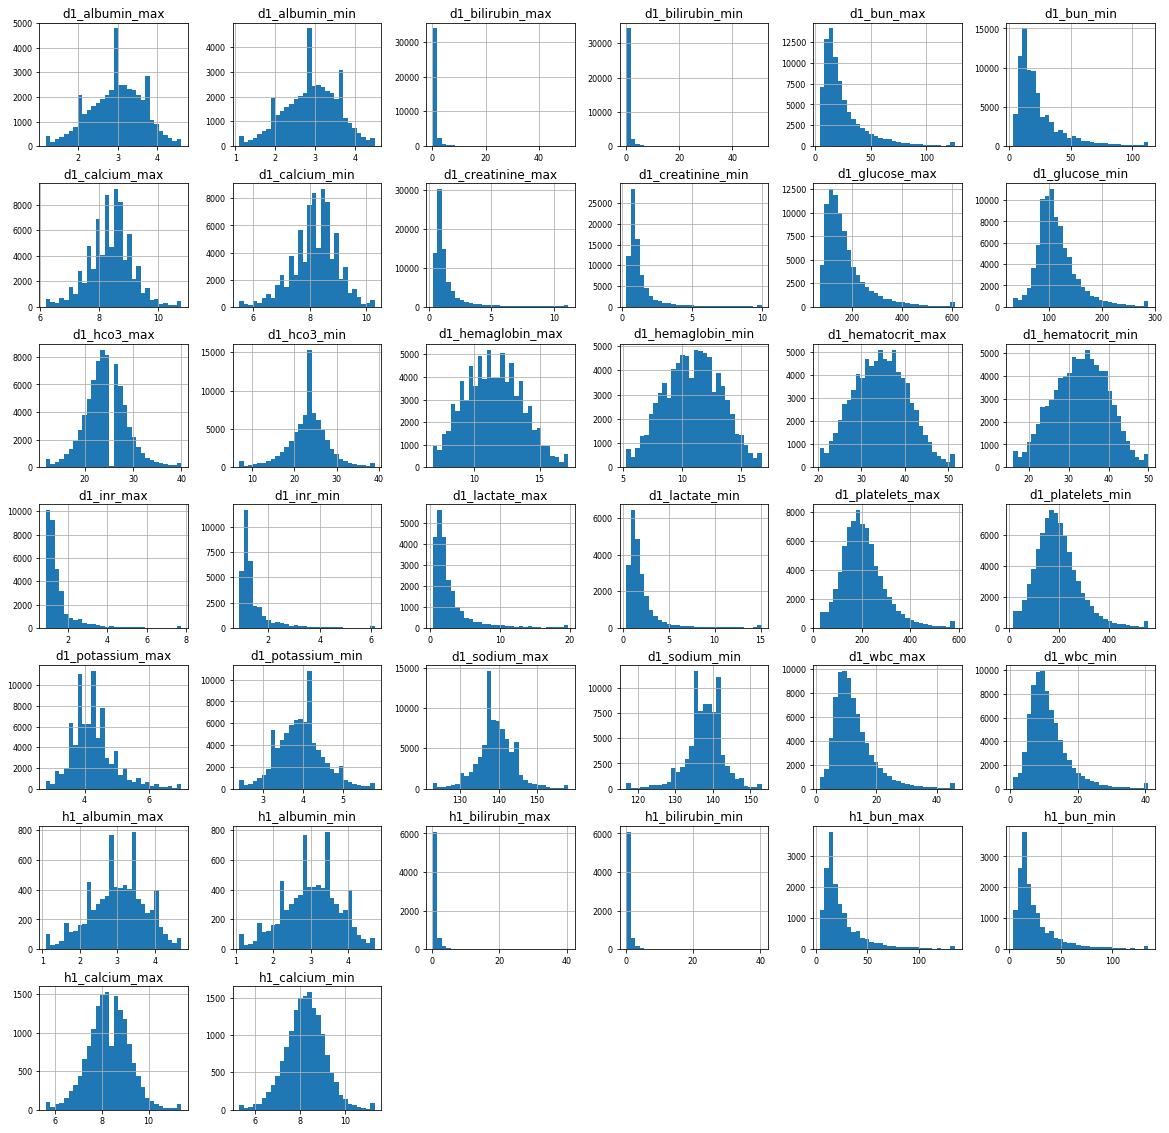

In [16]:
labs_subset = train[name]

labs_subset.hist(figsize = (20,20),bins=30,xlabelsize=8,ylabelsize=8)
plt.show()

# Relationship between Missing Data & Death 

In [8]:
for i in name:
    if train[i].isna()[train.hospital_death == 1].sum()/7915>0.6:
        print(i , train[i].isna()[train.hospital_death == 1].sum()/7915)

h1_albumin_max 0.8578648136449779
h1_albumin_min 0.8578648136449779
h1_bilirubin_max 0.8717624763108023
h1_bilirubin_min 0.8717624763108023
h1_bun_max 0.7713202779532533
h1_bun_min 0.7713202779532533
h1_calcium_max 0.7840808591282376
h1_calcium_min 0.7840808591282376


# Add new columns

In [9]:
train['if_h1_albumin_max_missed'] = train['h1_albumin_max'].isna()

In [10]:
train['if_h1_bilirubin_max_missed'] = train['h1_bilirubin_max'].isna()

In [11]:
train['if_h1_bun_max_missed'] = train['h1_bun_max'].isna()

In [12]:
train['if_h1_calcium_max_missed'] = train['h1_calcium_max'].isna()

# Highly correlated features

In [13]:
X1 = train.drop('hospital_death',axis = 1)

In [14]:
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = X1.corr().abs()
corr_matrix

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,if_h1_albumin_max_missed,if_h1_bilirubin_max_missed,if_h1_bun_max_missed,if_h1_calcium_max_missed
encounter_id,1.000000,0.009575,0.004532,0.003990,0.001068,0.002036,0.005400,0.000992,0.000570,NaN,...,0.003402,0.000972,0.001707,0.002172,0.001176,0.004646,0.003311,0.003215,0.002706,0.001554
patient_id,0.009575,1.000000,0.007075,0.006343,0.001380,0.001387,0.002902,0.001770,0.004412,NaN,...,0.000434,0.001667,0.000548,0.000844,0.002333,0.003065,0.002764,0.002782,0.001986,0.001557
hospital_id,0.004532,0.007075,1.000000,0.008673,0.012874,0.052123,0.027895,0.004526,0.001285,NaN,...,0.011978,0.001362,0.000146,0.002992,0.002588,0.004730,0.035445,0.038527,0.048069,0.052032
age,0.003990,0.006343,0.008673,1.000000,0.087077,0.067320,0.109937,0.024257,0.049872,NaN,...,0.077908,0.020061,0.025007,0.030310,0.023335,0.025924,0.019911,0.021382,0.010028,0.007807
bmi,0.001068,0.001380,0.012874,0.087077,1.000000,0.015921,0.056316,0.001403,0.001531,NaN,...,0.172943,0.001855,0.031144,0.013375,0.010017,0.043380,0.007635,0.007720,0.006450,0.004777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
solid_tumor_with_metastasis,0.004646,0.003065,0.004730,0.025924,0.043380,0.015369,0.004921,0.014381,0.036581,NaN,...,0.013122,0.007240,0.269653,0.006210,0.014749,1.000000,0.005289,0.006494,0.006565,0.004692
if_h1_albumin_max_missed,0.003311,0.002764,0.035445,0.019911,0.007635,0.006978,0.008634,0.032616,0.020520,NaN,...,0.009610,0.016659,0.004873,0.005892,0.004515,0.005289,1.000000,0.937988,0.625498,0.616548
if_h1_bilirubin_max_missed,0.003215,0.002782,0.038527,0.021382,0.007720,0.009108,0.011597,0.027030,0.014480,NaN,...,0.005702,0.019746,0.006818,0.005481,0.004574,0.006494,0.937988,1.000000,0.588603,0.580338
if_h1_bun_max_missed,0.002706,0.001986,0.048069,0.010028,0.006450,0.146904,0.021328,0.027096,0.050283,NaN,...,0.042946,0.002152,0.005715,0.001587,0.002764,0.006565,0.625498,0.588603,1.000000,0.965981


In [15]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [16]:
drop = []
for i in to_drop:
    if i in name.tolist():
        drop.append(i)

In [17]:
drop.append('d1_lactate_max')
drop.append('d1_lactate_min')

In [18]:
drop

['d1_albumin_max',
 'd1_albumin_min',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_glucose_max',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_platelets_min',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_bun_max',
 'h1_bun_min',
 'h1_calcium_min',
 'd1_lactate_max',
 'd1_lactate_min']

In [19]:
drop.append('h1_albumin_max')
drop.append('h1_calcium_max')

In [20]:
drop = list(set(drop))

In [21]:
keep=[]
for i in name:
    if i not in drop:
        keep.append(i)

In [22]:
keep

['d1_calcium_max',
 'd1_calcium_min',
 'd1_glucose_min',
 'd1_hco3_max',
 'd1_hco3_min',
 'd1_hemaglobin_max',
 'd1_inr_max',
 'd1_inr_min',
 'd1_platelets_max',
 'd1_potassium_max',
 'd1_potassium_min',
 'd1_sodium_max']

In [42]:
train.corr()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,if_h1_albumin_max_missed,if_h1_bilirubin_max_missed,if_h1_bun_max_missed,if_h1_calcium_max_missed
encounter_id,1.000000,-0.009575,-0.004532,-0.005243,-0.003990,-0.001068,0.002036,-0.005400,-0.000992,-0.000570,...,0.003402,-0.000972,-0.001707,-0.002172,-0.001176,-0.004646,0.003311,0.003215,0.002706,0.001554
patient_id,-0.009575,1.000000,-0.007075,0.004877,0.006343,-0.001380,0.001387,0.002902,-0.001770,-0.004412,...,0.000434,-0.001667,0.000548,0.000844,0.002333,-0.003065,0.002764,0.002782,0.001986,0.001557
hospital_id,-0.004532,-0.007075,1.000000,-0.001255,-0.008673,0.012874,0.052123,0.027895,0.004526,-0.001285,...,0.011978,0.001362,0.000146,-0.002992,0.002588,-0.004730,-0.035445,-0.038527,-0.048069,-0.052032
hospital_death,-0.005243,0.004877,-0.001255,1.000000,0.111017,-0.031247,-0.093574,-0.019526,0.000994,0.063316,...,-0.015784,0.038864,0.043973,0.029788,0.018722,0.051105,-0.061509,-0.058543,-0.037849,-0.035032
age,-0.003990,0.006343,-0.008673,0.111017,1.000000,-0.087077,0.067320,-0.109937,-0.024257,0.049872,...,0.077908,-0.020061,0.025007,0.030310,0.023335,0.025924,0.019911,0.021382,0.010028,0.007807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
solid_tumor_with_metastasis,-0.004646,-0.003065,-0.004730,0.051105,0.025924,-0.043380,0.015369,0.004921,-0.014381,0.036581,...,-0.013122,0.007240,0.269653,0.006210,0.014749,1.000000,-0.005289,-0.006494,0.006565,0.004692
if_h1_albumin_max_missed,0.003311,0.002764,-0.035445,-0.061509,0.019911,-0.007635,0.006978,-0.008634,-0.032616,-0.020520,...,-0.009610,-0.016659,-0.004873,-0.005892,0.004515,-0.005289,1.000000,0.937988,0.625498,0.616548
if_h1_bilirubin_max_missed,0.003215,0.002782,-0.038527,-0.058543,0.021382,-0.007720,0.009108,-0.011597,-0.027030,-0.014480,...,-0.005702,-0.019746,-0.006818,-0.005481,0.004574,-0.006494,0.937988,1.000000,0.588603,0.580338
if_h1_bun_max_missed,0.002706,0.001986,-0.048069,-0.037849,0.010028,-0.006450,-0.146904,-0.021328,-0.027096,-0.050283,...,-0.042946,-0.002152,0.005715,0.001587,0.002764,0.006565,0.625498,0.588603,1.000000,0.965981
